# **Clustering Perbandingan Harga Barang Pengecoran dari 2 Vendor Perusahaan**



# **1. Import Library**

Pada tahap ini, kita melakukan import beberapa library Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [57]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor library matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **2. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

In [58]:
# Membaca dataset CHP 172 untuk barang-barang kebutuhan pengecoran dan menampilkan 5 baris pertama
df = pd.read_excel('/content/172_Mesin_Ayakan_Midleton_Final.xlsx')
df.head()

,Nama Barang,PT. NEO PRIMA PUTRA,PT. Sarwa Engineering
0,Mesin Ayakan Midleton,233403600,223651731
1,"Upah Pabrikasi, Bongkar, Pasang",71000000,67095519
2,"Transport Unit, Alat Kerja & Tenaga Kerja",50000000,60000000
3,Biaya Dokumentasi Pekerjaan pada kertas foto d...,150000,750000
4,Bowplank,174000,400000


In [59]:
#Type your code here
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Nama Barang            139 non-null    object
 1   PT. NEO PRIMA PUTRA    139 non-null    int64 
 2   PT. Sarwa Engineering  139 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


In [60]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,PT. NEO PRIMA PUTRA,PT. Sarwa Engineering
count,1.390000e+02,1.390000e+02
mean,3.533324e+06,3.669189e+06
std,2.102002e+07,2.031712e+07
min,2.175000e+03,2.250000e+03
25%,5.800000e+04,7.500000e+04
50%,2.610000e+05,3.375000e+05
75%,1.004125e+06,1.557500e+06
max,2.334036e+08,2.236517e+08


from matplotlib import pyplot as plt
_df_9['PT. NEO PRIMA PUTRA'].plot(kind='hist', bins=20, title='PT. NEO PRIMA PUTRA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PT. Sarwa Engineering'].plot(kind='hist', bins=20, title='PT. Sarwa Engineering')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='PT. NEO PRIMA PUTRA', y='PT. Sarwa Engineering', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['PT. NEO PRIMA PUTRA'].plot(kind='line', figsize=(8, 4), title='PT. NEO PRIMA PUTRA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['PT. Sarwa Engineering'].plot(kind='line', figsize=(8, 4), title='PT. Sarwa Engineering')
plt.gca().spines[['top', 'right']].set_visible(False)

# **4. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [61]:
#Type your code here
X = df.iloc[:, [2, 1]].values # Change column indices to [2, 1]

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['PT. NEO PRIMA PUTRA', 'PT. Sarwa Engineering']))

     PT. NEO PRIMA PUTRA  PT. Sarwa Engineering
0              223651731              233403600
1               67095519               71000000
2               60000000               50000000
3                 750000                 150000
4                 400000                 174000
..                   ...                    ...
134                85000                 126150
135               100000                  94250
136               130000                  68150
137                25000                  21750
138               100000                 435000

[139 rows x 2 columns]


# **5. Pembangunan Model Clustering**

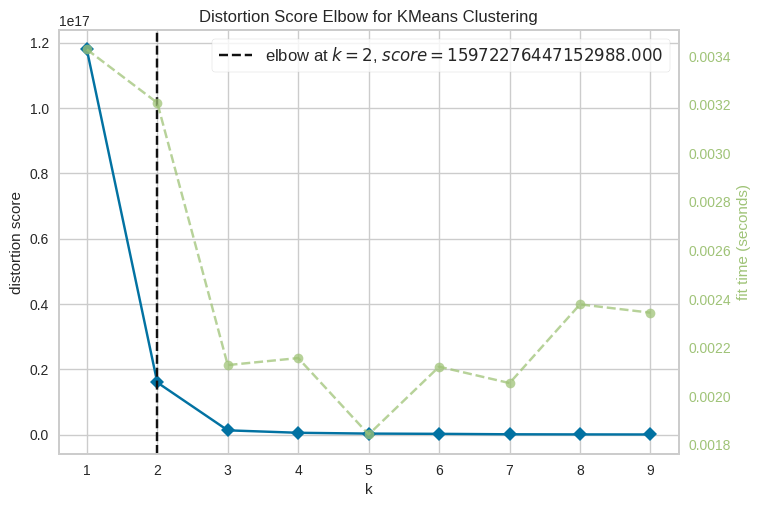

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering untuk mengelompokkan data berdasarkan kesamaan.Latih model dengan data menggunakan algoritma tersebut.

In [69]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 5
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 2

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_neo = cluster_data[:, 0].mean()
        mean_sarwa = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Harga PT.NEO PRIMA: {mean_neo:.2f}")
        print(f"Rata-rata Harga PT. Sarwa Engineering: {mean_sarwa:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Harga PT.NEO PRIMA: 2075112.46
Rata-rata Harga PT. Sarwa Engineering: 1867597.10

Cluster 2:
Rata-rata Harga PT.NEO PRIMA: 223651731.00
Rata-rata Harga PT. Sarwa Engineering: 233403600.00


In [70]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.9764337996743939


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

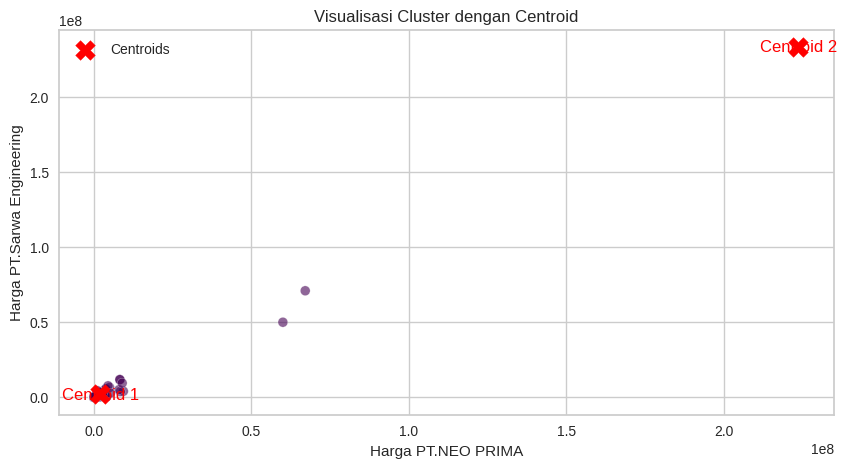

Nilai Centroids:
Centroid 1: HargaNEO = 2075112.46, HargaSarwa = 1867597.10
Centroid 2: HargaNEO = 223651731.00, HargaSarwa = 233403600.00


In [81]:
#Type your code here
import matplotlib.pyplot as plt
import numpy as np

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(10, 5))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Harga PT.NEO PRIMA')
plt.ylabel('Harga PT.Sarwa Engineering')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: HargaNEO = {centroid[0]:.2f}, HargaSarwa = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah mendapatkan clustering barang berdasarkan perbandingan harga dua PT, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan berdasarkan hasil clustering ini PT manakah yang lebih baik di ambil perusahaan berdasarkan barang-barang yang sama terhadap permintaan penawaran dari ke dua PT? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Analisis Karakteristik dan Rekomendasi Cluster

## Analisis Karakteristik Setiap Cluster

### Cluster 1:
- **Rata-rata Harga PT. NEO PRIMA**: 2,075,112.46  
- **Rata-rata Harga PT. Sarwa Engineering**: 1,867,597.10  
- **Interpretasi**:  
  Barang dalam Cluster 1 memiliki rentang harga lebih rendah dibandingkan Cluster 2.  
  PT. Sarwa Engineering menawarkan harga yang lebih kompetitif dibandingkan PT. NEO PRIMA di segmen ini.  
  Barang dalam cluster ini kemungkinan mencakup produk-produk standar atau dengan kompleksitas rendah.  

### Cluster 2:
- **Rata-rata Harga PT. NEO PRIMA**: 223,651,731.00  
- **Rata-rata Harga PT. Sarwa Engineering**: 233,403,600.00  
- **Interpretasi**:  
  Barang dalam Cluster 2 memiliki rentang harga yang jauh lebih tinggi.  
  PT. NEO PRIMA lebih kompetitif dibandingkan PT. Sarwa Engineering di segmen ini.  
  Barang dalam cluster ini kemungkinan mencakup produk-produk premium dengan spesifikasi teknis atau kompleksitas yang tinggi.  

---

## Kesimpulan dan Rekomendasi

### Tingkat kesesuaian model
- Berdasarkan Interpretasi Silhouette Score: 0.9764, menunjukkan bahwa hasil clustering memiliki pemisahan yang sangat baik. Data dalam setiap cluster sangat mirip satu sama lain dan cukup berbeda dari data di cluster lainnya. Dengan kata lain, clustering ini sangat efektif dalam mengelompokkan data berdasarkan pola yang ada.

### Kesesuaian Clustering dengan Ekspektasi:
- Hasil clustering sesuai dengan ekspektasi, yaitu mengelompokkan barang berdasarkan tingkat harga.  
- Cluster 1 berisi barang dengan harga rendah hingga menengah, sedangkan Cluster 2 mencakup barang dengan harga tinggi.  

### Perusahaan yang Layak Dipilih:
- Untuk barang di **Cluster 1**, **PT. Sarwa Engineering** lebih direkomendasikan karena menawarkan harga rata-rata lebih rendah.  
- Untuk barang di **Cluster 2**, **PT. NEO PRIMA** lebih disarankan karena harganya lebih kompetitif dibandingkan PT. Sarwa Engineering.  

### Pola yang Dapat Dimanfaatkan:
1. Barang dengan harga tinggi (Cluster 2) adalah area persaingan utama.  
   Strategi negosiasi lebih penting untuk barang dalam segmen ini.  
2. Barang di Cluster 1 menunjukkan perbedaan harga yang lebih kecil.  
   Perusahaan dapat mempertimbangkan aspek non-harga, seperti:  
   - Waktu pengiriman  
   - Kualitas produk  
   - Dukungan purna jual  

---

## Saran Strategis

1. **Optimasi Pengadaan**:  
   - Fokus pada barang dari penyedia dengan harga lebih rendah di masing-masing cluster.  
   - Untuk **Cluster 2**, prioritaskan **PT. NEO PRIMA**.  
   - Untuk **Cluster 1**, pilih **PT. Sarwa Engineering**.  

2. **Analisis Lebih Lanjut**:  
   - Periksa detail spesifikasi barang dalam setiap cluster.  
   - Pola harga tinggi atau rendah dapat mencerminkan kualitas atau fitur tambahan tertentu.  

3. **Diversifikasi Mitra**:  
   - Manfaatkan kekuatan masing-masing PT untuk barang di segmen harga yang berbeda.  
   - Mengurangi ketergantungan pada satu vendor untuk mengoptimalkan biaya.  


# **6. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [82]:
#eksport data Simpan hasilnya ke dalam file CSV.

import pandas as pd

df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels

# Export DataFrame ke CSV file
df_with_clusters.to_csv('/datalab/hasil_perbandingan.csv', index=False)

In [85]:
# Membaca dataset hasil cluster perbandingan harga barang CHP 172 untuk barang-barang kebutuhan pengecoran dan menampilkan 5 baris pertama
data = pd.read_csv('/datalab/hasil_perbandingan.csv')
data.head()

,Nama Barang,PT. NEO PRIMA PUTRA,PT. Sarwa Engineering,Cluster
0,Mesin Ayakan Midleton,233403600,223651731,1
1,"Upah Pabrikasi, Bongkar, Pasang",71000000,67095519,0
2,"Transport Unit, Alat Kerja & Tenaga Kerja",50000000,60000000,0
3,Biaya Dokumentasi Pekerjaan pada kertas foto d...,150000,750000,0
4,Bowplank,174000,400000,0


In [86]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Nama Barang            139 non-null    object
 1   PT. NEO PRIMA PUTRA    139 non-null    int64 
 2   PT. Sarwa Engineering  139 non-null    int64 
 3   Cluster                139 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.5+ KB


,PT. NEO PRIMA PUTRA,PT. Sarwa Engineering,Cluster
count,1.390000e+02,1.390000e+02,139.000000
mean,3.533324e+06,3.669189e+06,0.007194
std,2.102002e+07,2.031712e+07,0.084819
min,2.175000e+03,2.250000e+03,0.000000
25%,5.800000e+04,7.500000e+04,0.000000
50%,2.610000e+05,3.375000e+05,0.000000
75%,1.004125e+06,1.557500e+06,0.000000
max,2.334036e+08,2.236517e+08,1.000000
